In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from matplotlib.colors import LogNorm
import astropy.units as u
import astropy.constants as c
import glob

In [2]:
plt.rc('axes', labelsize=14)
plt.rc('figure', titlesize=30)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
# BP Stylization parameters.

In [56]:
dir = r'C:\Users\Brock\Documents\Git\Research\CCDs\Sophia\Data\20240607'#\20241102\PTC'

science_in_list = glob.glob(dir + r'\science_*_bd.fits')

science_in_list.sort()

TypeError: buffer is too small for requested array

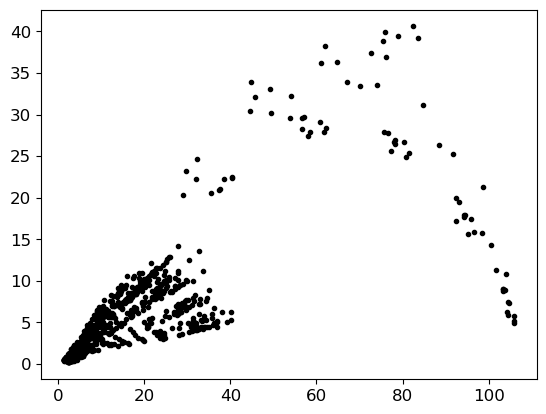

In [59]:
locs = [0, 256, 512, 768, 1024]#, 1280, 1536]
step = 1024
# Exclude very edges

for file in science_in_list:
    hdul = fits.open(file)
    data = hdul[0].data[0]
    hdul.close()

    for i in locs:
        for j in locs:
            #print(i,j)
            region = data[i:i+step, j:j+step]

            #plt.imshow(region)
            #plt.show()

            signal = np.mean(region)
            error = np.std(region)

            plt.plot(signal, error, ls='', marker='.', color='k')

plt.xscale('log')
plt.yscale('log')
plt.show()